# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(2360873)

In [6]:
df = pd.read_csv("../resources/previsao_de_renda.csv").drop('Unnamed: 0', axis=1)
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [9]:
#1
df.corr()

,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
index,1.000000,-0.007542,-0.099683,0.039734,-0.047971,-0.034574,0.041818,0.130691,-0.001740
posse_de_veiculo,-0.007542,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,-0.099683,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.039734,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.047971,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.034574,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.041818,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,0.130691,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,-0.001740,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


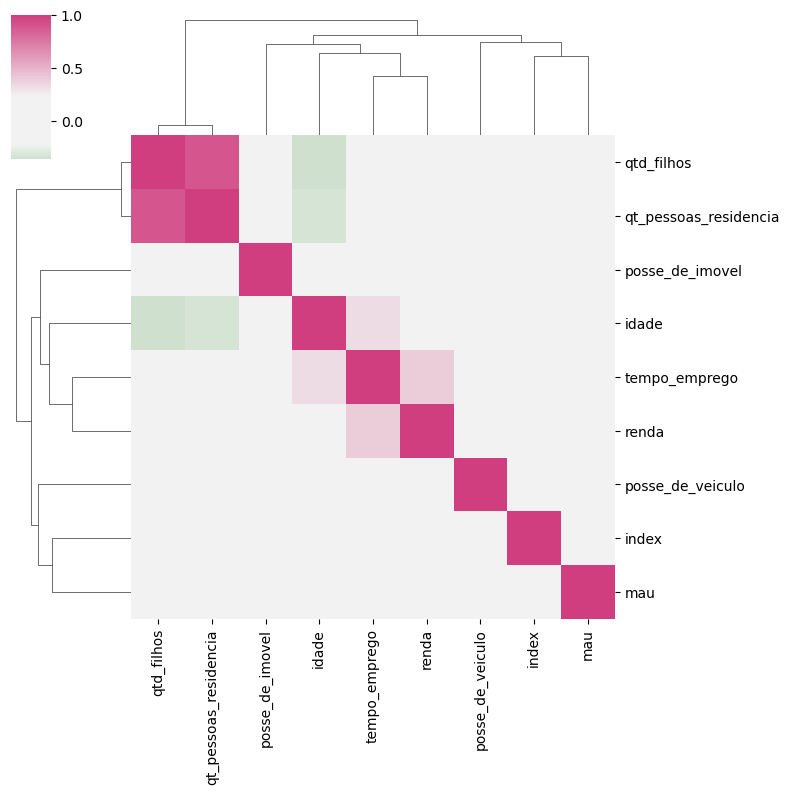

In [12]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(df.corr(), figsize=(8, 8), center = 0, cmap=cmap)
#Existe uma grande relação entre a quantidade de filhos e a quantidade de pessoas na residência, o que é óbvio. 
#Já a relação entre quantidade de filhos e idade é baixa, o que é curioso, já que é esperado que uma maior idade implica
#em mais tempo para ter mais filhos.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

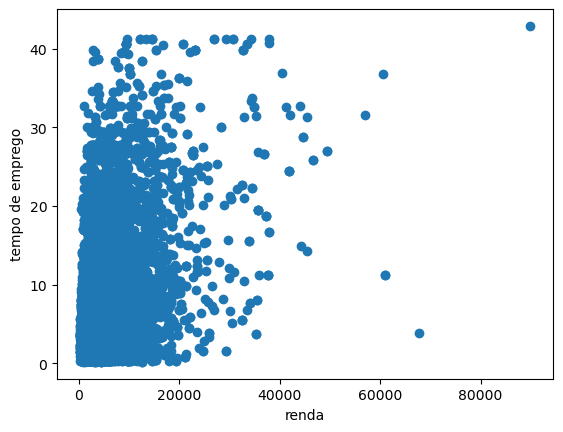

In [15]:
plt.scatter(df['renda'], df['tempo_emprego'])

plt.xlabel('renda')
plt.ylabel('tempo de emprego')

plt.show()

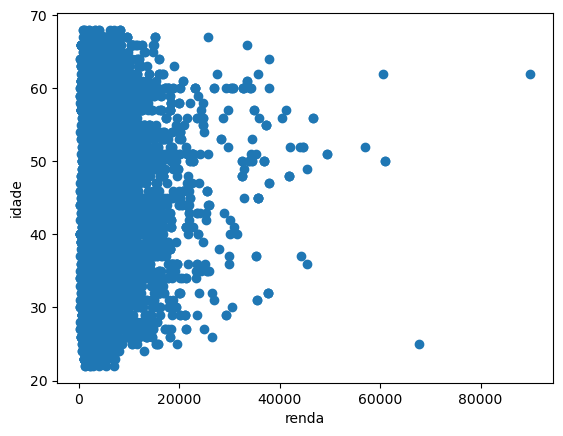

In [18]:
plt.scatter(df['renda'], df['idade'])

plt.xlabel('renda')
plt.ylabel('idade')

plt.show()

In [ ]:
#os gráficos scatter parecem dizer pouca coisa sobre isso.

3) Na su aopinião, há outliers na variável renda?

In [19]:
print("Sim. Valores a partir de aproximadamente 56000 parecem distorcer o gráfico drasticamente.")

Sim. Valores a partir de aproximadamente 56000 parecem distorcer o gráfico drasticamente.


4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [29]:
df_log = df.copy()
df_log['log_renda'] = np.log(df_log['renda'])

In [32]:
df_log.corr()

,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,log_renda
index,1.000000,-0.007542,-0.099683,0.039734,-0.047971,-0.034574,0.041818,0.130691,-0.001740,0.002993
posse_de_veiculo,-0.007542,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414,0.090529
posse_de_imovel,-0.099683,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827,0.045297
qtd_filhos,0.039734,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567,0.023743
idade,-0.047971,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570,0.024712
tempo_emprego,-0.034574,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235,0.379556
qt_pessoas_residencia,0.041818,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977,0.036267
mau,0.130691,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577,-0.014193
renda,-0.001740,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000,0.835734
log_renda,0.002993,0.090529,0.045297,0.023743,0.024712,0.379556,0.036267,-0.014193,0.835734,1.000000


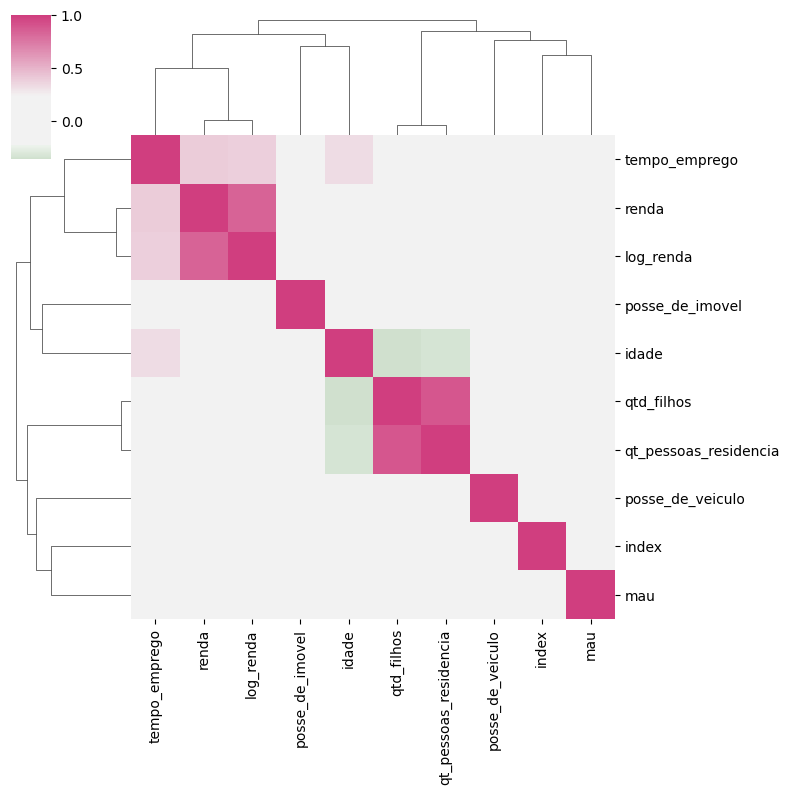

In [33]:
sns.clustermap(df_log.corr(), figsize=(8, 8), center = 0, cmap=cmap)

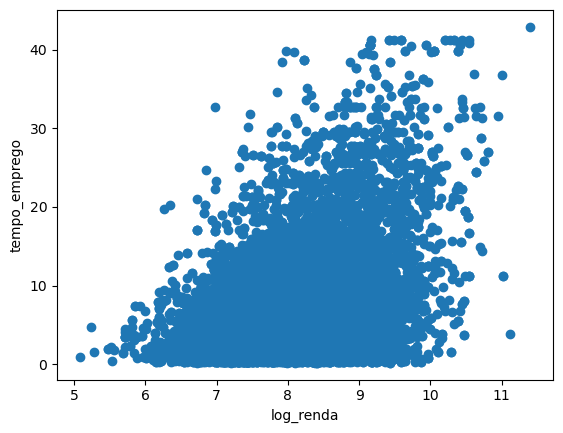

In [31]:
plt.scatter(df_log['log_renda'], df_log['tempo_emprego'])

plt.xlabel('log_renda')
plt.ylabel('tempo_emprego')

plt.show()

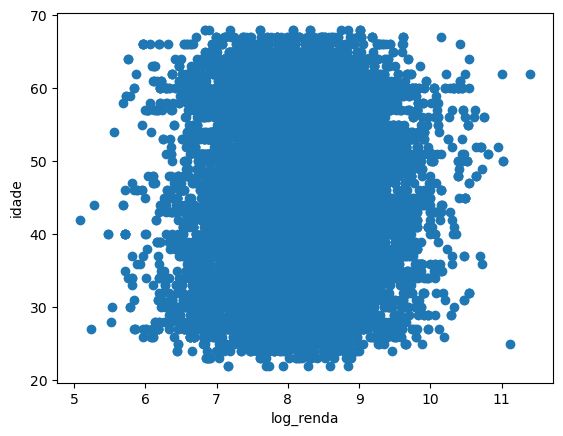

In [30]:
plt.scatter(df_log['log_renda'], df_log['idade'])

plt.xlabel('log_renda')
plt.ylabel('idade')

plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [34]:
print("Aparentemente, fez com que os dados se agrupassem melhor, evidenciando novas relações que não eram claras antes, então parece ter ficado melhor.")

Aparentemente, fez com que os dados se agrupassem melhor, evidenciando novas relações que não eram claras antes, então parece ter ficado melhor.
